## Outlier Treatment Methods

## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np

## Load the dataset

In [24]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1st Outlier Treatment Method:
### Quantile based Flooring and Capping Method

In [3]:
arr = np.array([10, 20, 25, 30, 37, 83, 47, 82, 96, 78])
arr

array([10, 20, 25, 30, 37, 83, 47, 82, 96, 78])

#### np.where() : 
- Syntax : np.where(condition, value, seq_data_type)
- When the condition is True, it replace the value in array with the specified value

In [4]:
## use np.where() and Replace the values divisible by 5 in the arr with 500

np.where(arr % 5 == 0)

(array([0, 1, 2, 3], dtype=int64),)

In [5]:
np.where(arr % 5 == 0, 500, arr)

array([500, 500, 500, 500,  37,  83,  47,  82,  96,  78])

In [6]:
## use np.where and replace the value divisible by 3 in the arr with 775

np.where(arr % 3 == 0, 775, arr)

array([ 10,  20,  25, 775,  37,  83,  47,  82, 775, 775])

In [7]:
arr

array([10, 20, 25, 30, 37, 83, 47, 82, 96, 78])

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='LoanAmount'>

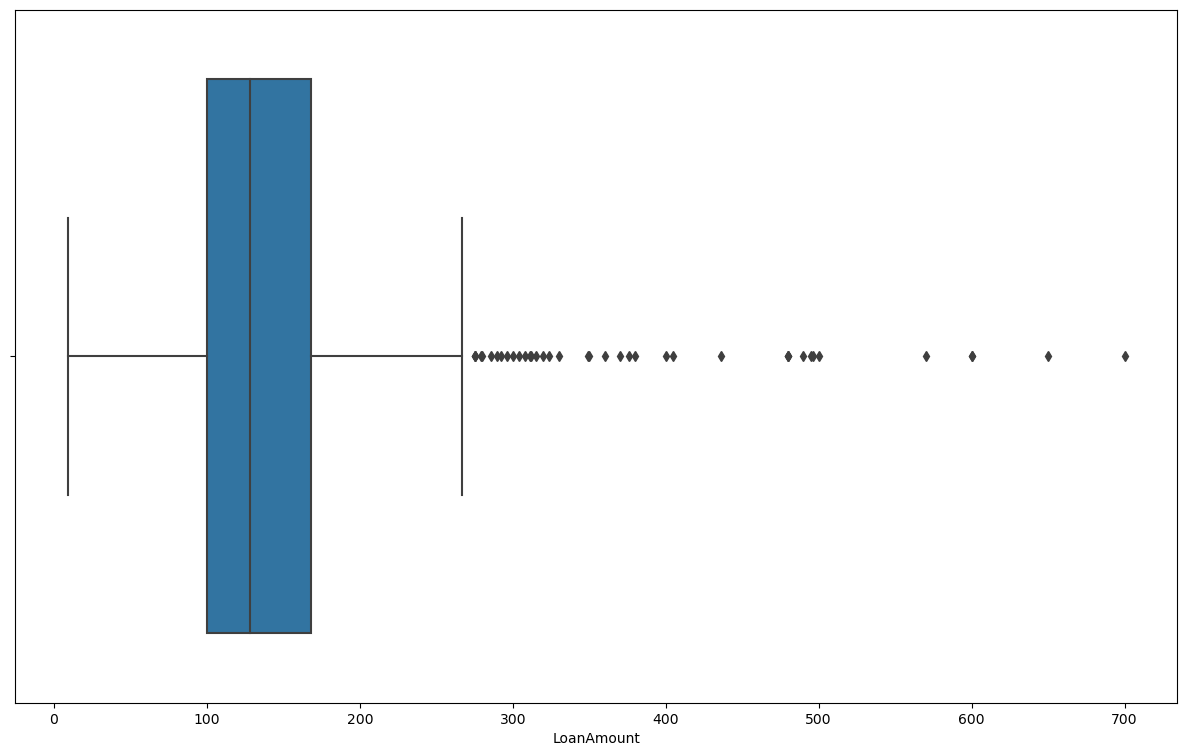

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))

sns.boxplot(x = data['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

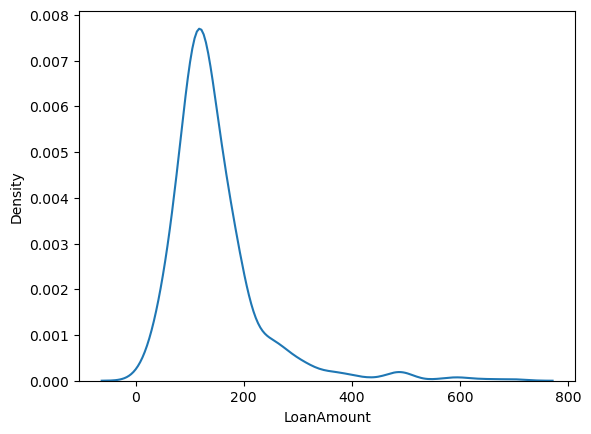

In [26]:
sns.kdeplot(x = data['LoanAmount'])

In [27]:
data['LoanAmount'].skew()

2.677551679256059

- When the value in the LoanAmount column is greater than 90% value and any value less than 10% value, i will treat that as an outlier and replace that outlier

## Step 1 : Finding out 90% and 10% value in the Loan Amount col

In [18]:
## Find out the 90% value

data['LoanAmount'].quantile(0.90)

235.79999999999995

In [19]:
## Find out the 10% Value

data['LoanAmount'].quantile(0.10)

71.0

## Step 2 : To find out in LoanAmount col where exactly is the value and then replace it with 71 and 235

In [28]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 71, 71, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 235, 235, data['LoanAmount'])

<Axes: xlabel='LoanAmount'>

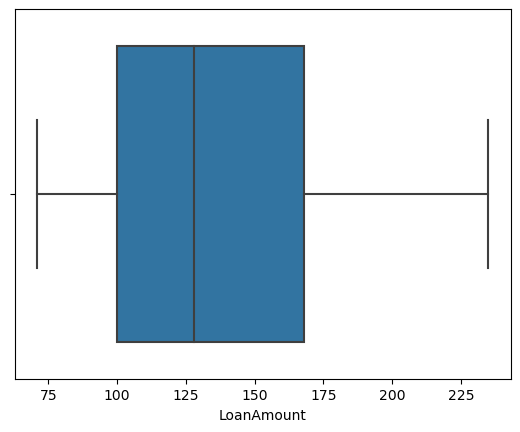

In [29]:
sns.boxplot(x = data['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

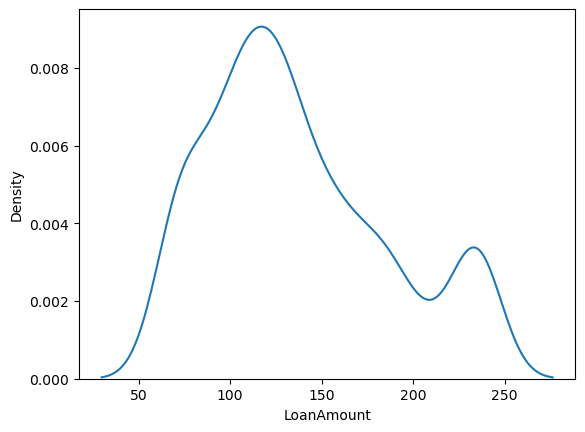

In [30]:
sns.kdeplot(x = data['LoanAmount'])

In [31]:
data['LoanAmount'].skew()

0.6231463951818582

## I want to reduce the skew still more in the data

In [32]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='LoanAmount'>

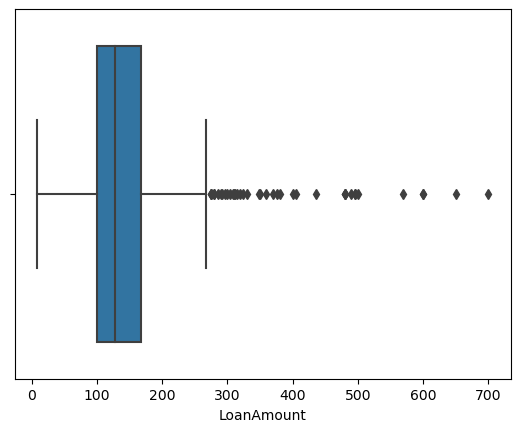

In [33]:
sns.boxplot(x = data['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

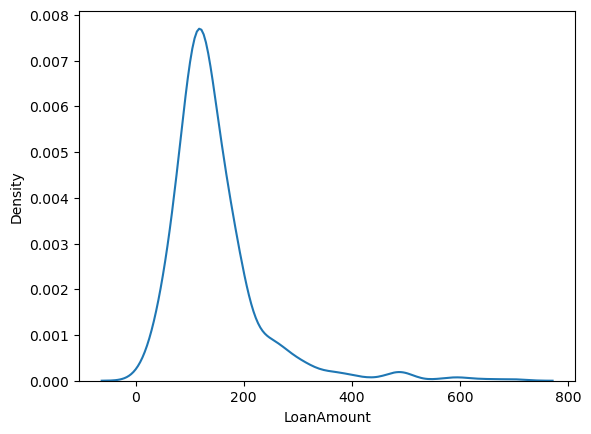

In [34]:
sns.kdeplot(x = data['LoanAmount'])

In [35]:
data['LoanAmount'].skew()

2.677551679256059

In [37]:
## Quantile based capping and flooring method

data['LoanAmount'].quantile(0.85)

182.0

In [38]:
data['LoanAmount'].quantile(0.15)

95.0

In [39]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 95, 95, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 182, 182, data['LoanAmount'])

<Axes: xlabel='LoanAmount'>

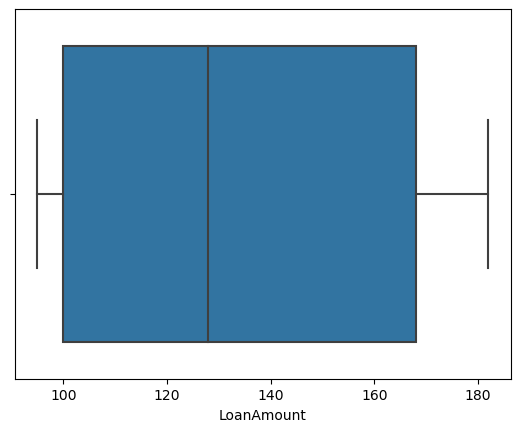

In [40]:
sns.boxplot(x = data['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

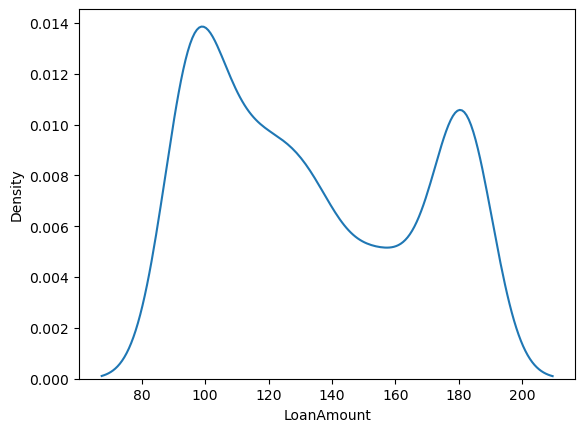

In [41]:
sns.kdeplot(x = data['LoanAmount'])

In [42]:
data['LoanAmount'].skew()

0.3198740061809601

## Method 2 : Outlier Trimming

<Axes: xlabel='CoapplicantIncome'>

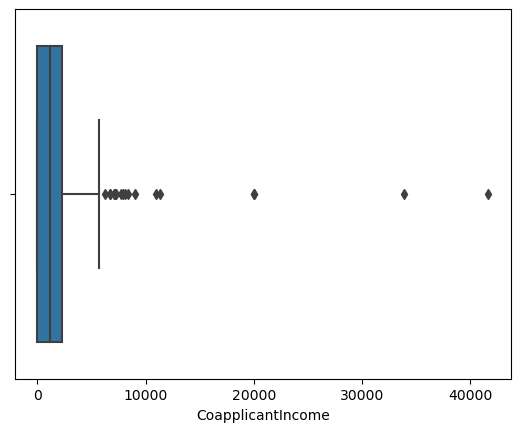

In [43]:
sns.boxplot(x = data['CoapplicantIncome'])

In [44]:
data['CoapplicantIncome'].skew()

7.491531216657306

## Step 1 : Calculate 75% value & 25% value

In [45]:
data['CoapplicantIncome'].quantile(0.75)

2297.25

In [46]:
data['CoapplicantIncome'].quantile(0.25)

0.0

## Step 2 : Find the index in the data where the value are > 75% and < 25% value

In [47]:
x = data[(data['CoapplicantIncome'] > 2297.25) | (data['CoapplicantIncome'] < 0)].index
x

Int64Index([  3,   5,   7,   9,  12,  13,  19,  21,  24,  30,
            ...
            579, 581, 585, 590, 593, 600, 601, 603, 605, 606],
           dtype='int64', length=154)

## Step 3 : drop the value at index from step 2

In [48]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].drop(x)
data['CoapplicantIncome'].skew()

0.6834089713639013

<Axes: xlabel='CoapplicantIncome'>

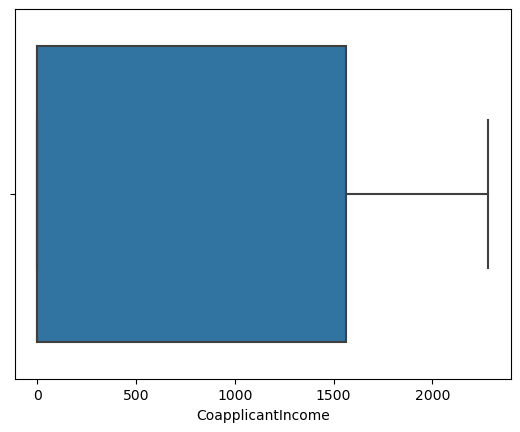

In [49]:
sns.boxplot(x = data['CoapplicantIncome'])

## Method 3 : Log Transformation Method

<Axes: xlabel='ApplicantIncome'>

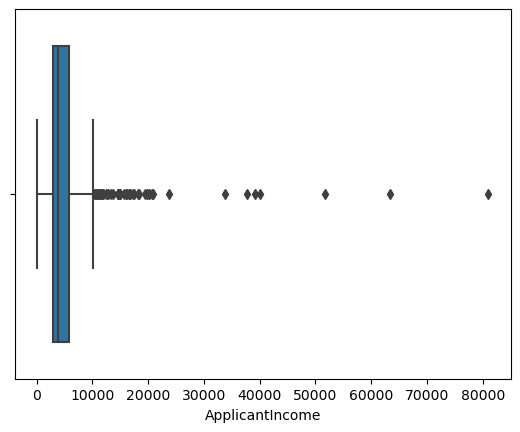

In [50]:
sns.boxplot(x = data['ApplicantIncome'])

In [51]:
data['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [52]:
np.log(5849)

8.674025985443025

In [54]:
np.log(4583)

8.430109084509125

In [55]:
data['ApplicantIncome_loged'] = np.log(data['ApplicantIncome'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_loged
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,95.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,NaN,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515


<Axes: xlabel='ApplicantIncome_loged'>

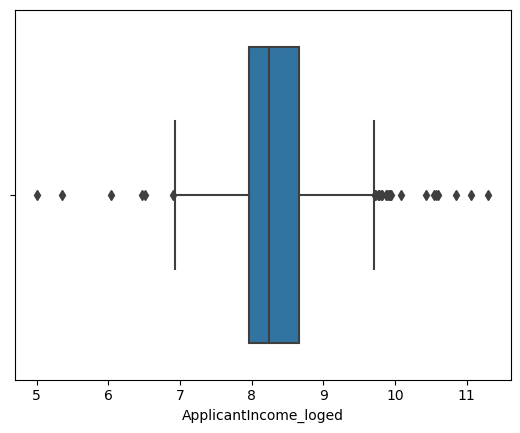

In [57]:
sns.boxplot(x = data['ApplicantIncome_loged'])

## Observations:

- Log Transformation method does not work well on the ApplicantIncome column

In [58]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='tip'>

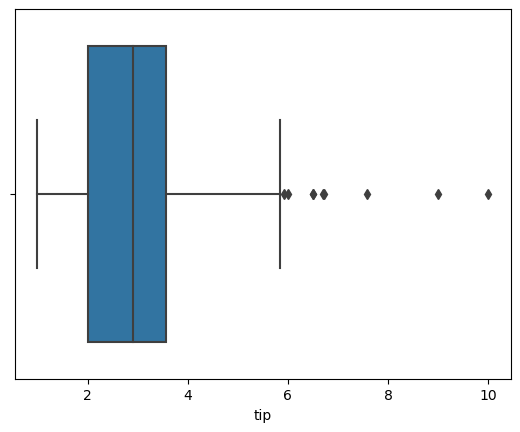

In [59]:
sns.boxplot(x = tips['tip'])

<Axes: xlabel='tip'>

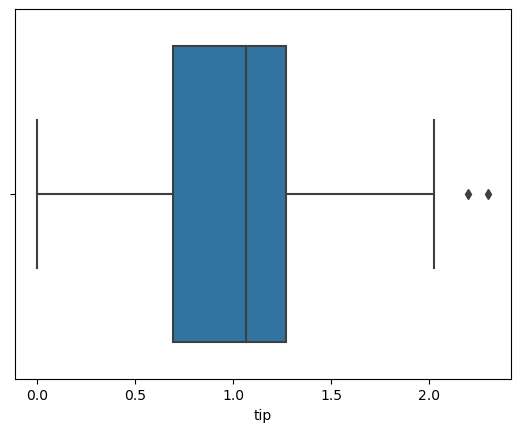

In [61]:
## Outlier treatment using log transformation method

sns.boxplot(x = np.log(tips['tip']))

## Method 4 : Replacing the outlier values with median of the col

In [62]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
data['LoanAmount'].skew()

2.677551679256059

## Step1 : Calc 85%, 15% and median of the col

In [65]:
## 85% value

data['LoanAmount'].quantile(0.85)

192.0

In [67]:
## 15% value

data['LoanAmount'].quantile(0.15)

84.64999999999999

In [69]:
## median 

data['LoanAmount'].quantile(0.50)

128.0

In [70]:
data['LoanAmount'].median()

128.0

## Step 2 : Find and Replace the outlier value with median value

In [71]:
data['LoanAmount'] = np.where(data['LoanAmount'] > 192, 128, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] < 84, 128, data['LoanAmount'])

<Axes: xlabel='LoanAmount'>

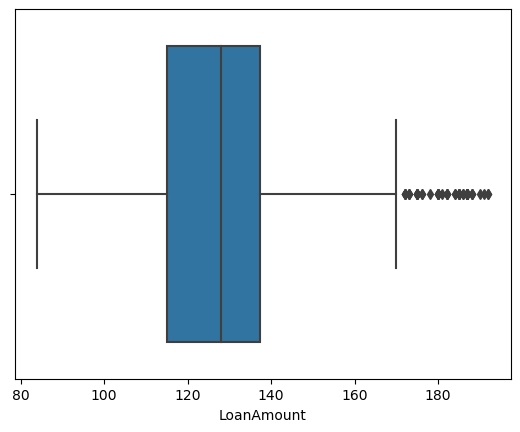

In [72]:
sns.boxplot(x = data['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

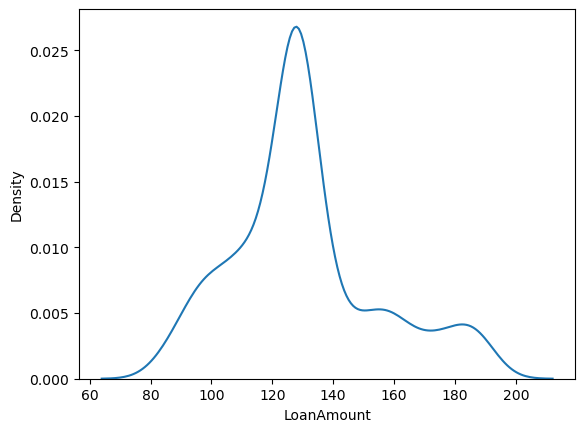

In [73]:
sns.kdeplot(x = data['LoanAmount'])

In [74]:
data['LoanAmount'].skew()

0.6599877184786516

## Method 5 : IQR method

#### Step 1 : Calc IQR

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             22.25
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64

## Step 2 : To find where exactly in the data outlier are present

In [81]:
low_end_out = q1 - 1.5 * IQR
upp_end_out = q3 + 1.5 * IQR

In [82]:
low_end_out

ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount             81.625
Loan_Amount_Term      360.000
Credit_History          1.000
dtype: float64

In [83]:
upp_end_out

ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             170.625
Loan_Amount_Term       360.000
Credit_History           1.000
dtype: float64

# Step 3 : Replace the outliers with IQR values

In [84]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 10171.250, 2917.50, data['ApplicantIncome'])
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] < -1498.75, 2917.50, data['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

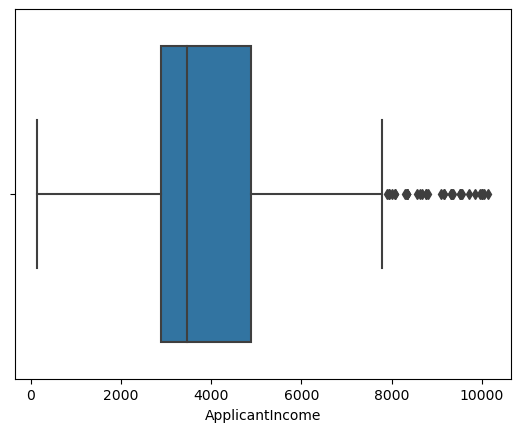

In [85]:
sns.boxplot(x = data['ApplicantIncome'])

In [86]:
data['ApplicantIncome'].skew()

1.1963937880165876

### 5 Methods:

1. Quantile based capping and flooring
2. Log Transformation method
3. IQR method
4. Median based method
5. Trimming

## Outlier Treatment is also a part of Data preprocessing step